In [17]:
#Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 


In [18]:
#Reading CSV file
df = pd.read_csv(r'C:\Users\NEEL\Untitled Folder\KNN\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

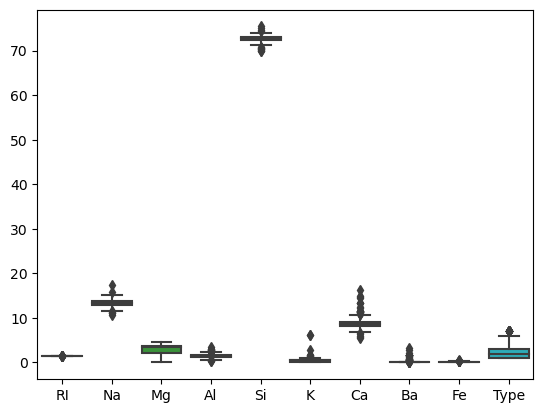

In [20]:
#Checking outliners
sns.boxplot(df)

<Axes: >

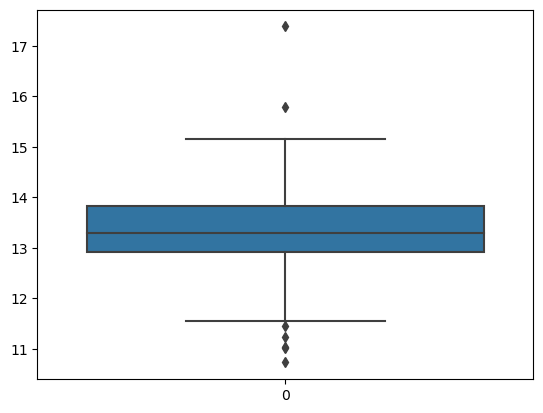

In [21]:
sns.boxplot(df['Na'])

<Axes: >

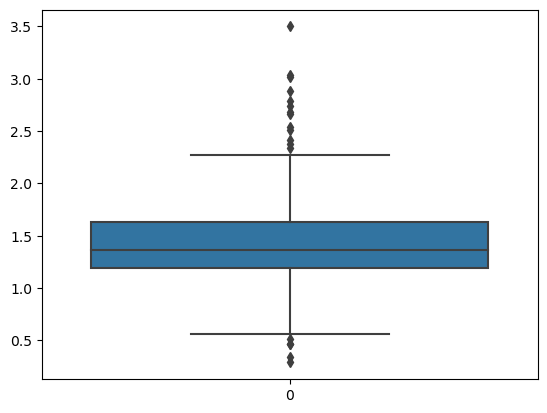

In [22]:
sns.boxplot(df['Al'])

In [23]:
#Checking missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [24]:
# Spiliting dependent and independent variable 
X = df.drop(['Type'],axis=1)
Y = df['Type']

In [25]:
print(X)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [26]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [27]:
#Standerization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled) 

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [29]:
#Spilting training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y,test_size=0.2, random_state=1)

# Model Building

In [30]:
#Creating instance for KNN 
knn = KNeighborsClassifier()

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [1,2,3,4,5,6,7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_scaled, Y)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [33]:
error_rate = []
for i in range(1,10):
 
 KNN = KNeighborsClassifier(n_neighbors=i)
 KNN.fit(xtrain,ytrain)
 pred_i = KNN.predict(xtest)
 error_rate.append(np.mean(pred_i != ytest))
print(error_rate)

[0.3023255813953488, 0.3023255813953488, 0.32558139534883723, 0.32558139534883723, 0.3023255813953488, 0.32558139534883723, 0.32558139534883723, 0.32558139534883723, 0.32558139534883723]


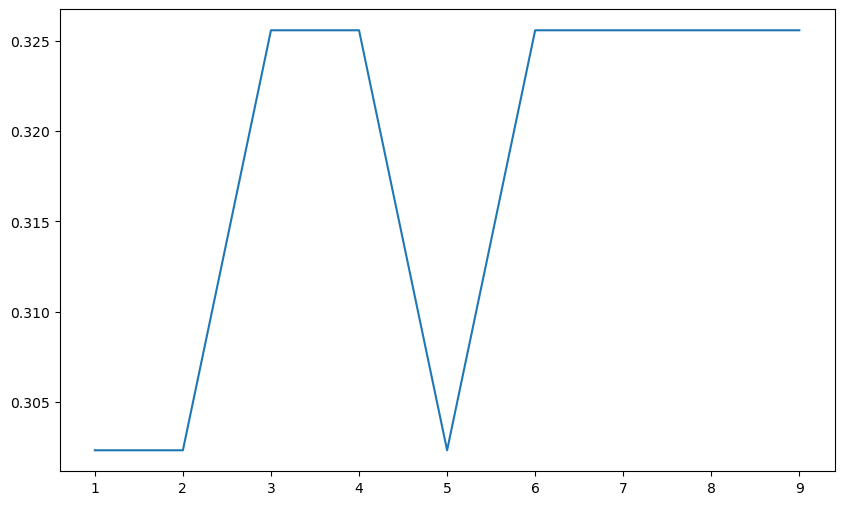

In [34]:
plt.figure(figsize=(10,6))
k_values = [1,2,3,4,5,6,7,8,9]
plt.plot(k_values,error_rate)
plt.show()

In [46]:
train_acc = []
test_acc = []

for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    train_acc.append(model.score(xtrain,ytrain))
    test_acc.append(model.score(xtest,ytest))

In [47]:
train_acc

[1.0,
 0.8362573099415205,
 0.8304093567251462,
 0.8070175438596491,
 0.7953216374269005,
 0.7719298245614035,
 0.7192982456140351,
 0.7192982456140351,
 0.7134502923976608]

In [48]:
test_acc

[0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628]

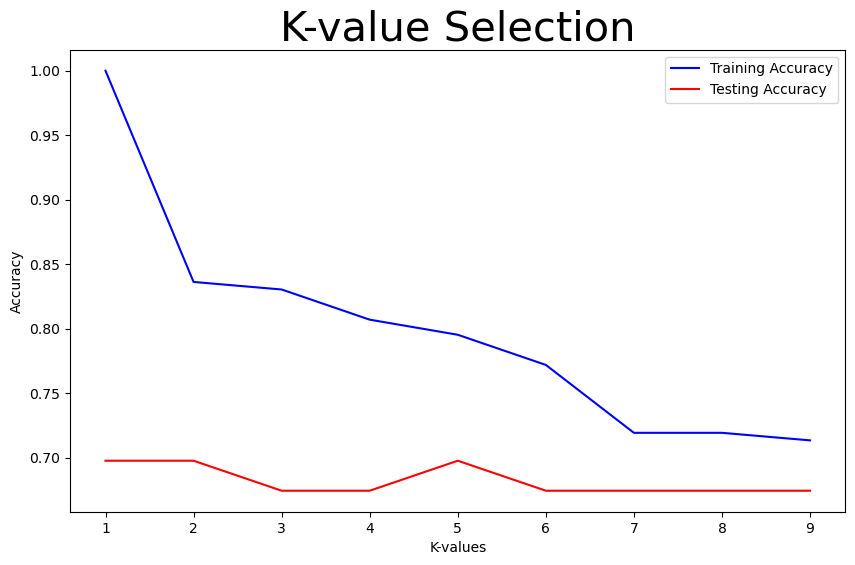

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,10), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [51]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
KNN_5.fit(xtrain,ytrain)
y_pred = KNN_5.predict(xtest)

In [53]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.62      0.83      0.71        12
           3       0.00      0.00      0.00         6
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         4

    accuracy                           0.70        43
   macro avg       0.57      0.76      0.63        43
weighted avg       0.63      0.70      0.66        43

